In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from collections import Counter

In [15]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.shape

(768, 9)

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# change 0 to NaN
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0, np.nan)

In [20]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [21]:
df['Pregnancies'] = np.where(df['Pregnancies'].isna(), np.random.uniform(1, 17, size=len(df)), df['Pregnancies'])
df['Glucose'] = np.where(df['Glucose'].isna(), np.random.uniform(20, 199, size=len(df)), df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure'].isna(), np.random.uniform(20, 122, size=len(df)), df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness'].isna(), np.random.uniform(1, 99, size=len(df)), df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin'].isna(), np.random.uniform(20, 846, size=len(df)), df['Insulin'])
df['BMI'] = np.where(df['BMI'].isna(), np.random.uniform(15, 67, size=len(df)), df['BMI'])

In [23]:
df['Pregnancies'] = df['Pregnancies'].round(1)
df['Glucose'] = df['Glucose'].round(1)
df['BloodPressure'] = df['BloodPressure'].round(1)
df['SkinThickness'] = df['SkinThickness'].round(1)
df['Insulin'] = df['Insulin'].round(1)
df['BMI'] = df['BMI'].round(1)

In [24]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,348.1,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,462.7,26.6,0.351,31,0
2,8.0,183.0,64.0,40.1,780.3,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,10.5,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,85.2,648.4,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,106.1,30.5,230.1,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,73.7,183.2,58.6,0.232,54,1


## Exploratory Data Analysis

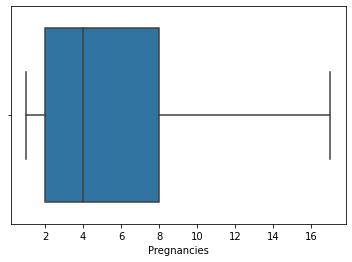

In [25]:
sns.boxplot(data=df, x='Pregnancies')
plt.show()

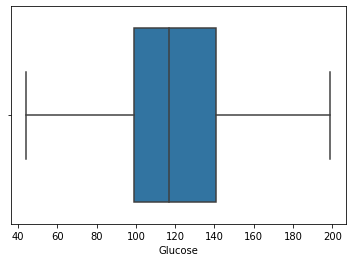

In [26]:
sns.boxplot(data=df, x='Glucose')
plt.show()

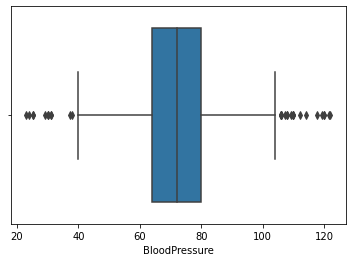

In [27]:
sns.boxplot(data=df, x='BloodPressure')
plt.show()

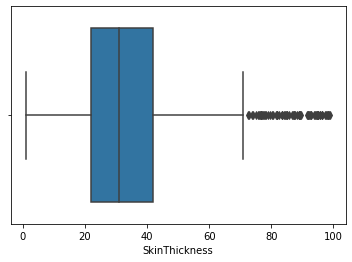

In [28]:
sns.boxplot(data=df, x='SkinThickness')
plt.show()

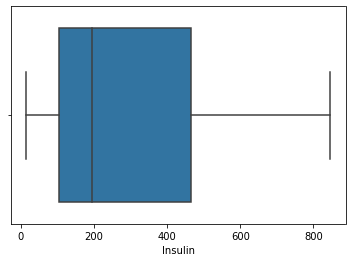

In [29]:
sns.boxplot(data=df, x='Insulin')
plt.show()

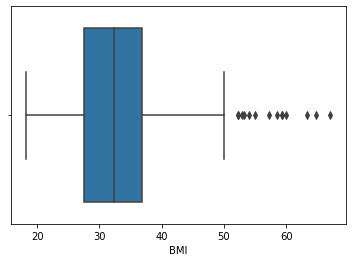

In [30]:
sns.boxplot(data=df, x='BMI')
plt.show()

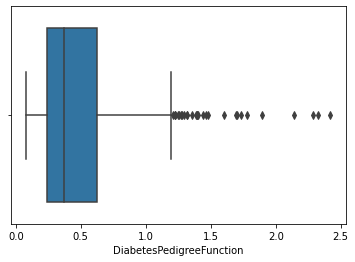

In [31]:
sns.boxplot(data=df, x='DiabetesPedigreeFunction')
plt.show()

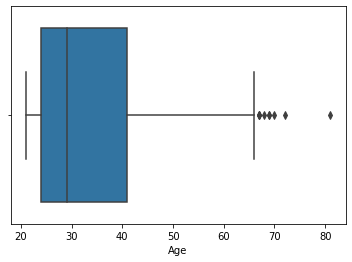

In [32]:
sns.boxplot(data=df, x='Age')
plt.show()

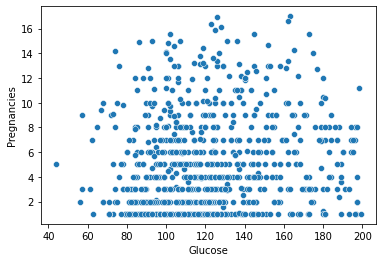

In [33]:
sns.scatterplot(data=df, x='Glucose', y='Pregnancies')
plt.show()

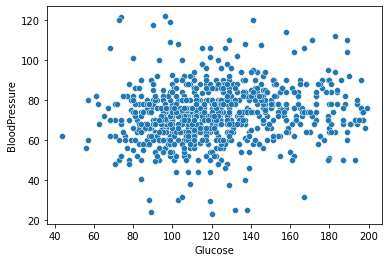

In [34]:
sns.scatterplot(data=df, x='Glucose', y='BloodPressure')
plt.show()

## Removing Outlier

In [40]:
def no_outliers(data, n, features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR = Q3 - Q1
    outlier_step = 1.5*IQR
    outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
  return multiple_outliers

dropped_outliers = no_outliers(df,2,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI'])
print("kita akan mendrop {} index".format(len(dropped_outliers)), dropped_outliers)

kita akan mendrop 0 index []


In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,348.1,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,462.7,26.6,0.351,31,0
2,8.0,183.0,64.0,40.1,780.3,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,10.5,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [126]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [45]:
from sklearn import metrics
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        99
           1       0.74      0.42      0.53        55

    accuracy                           0.74       154
   macro avg       0.74      0.67      0.68       154
weighted avg       0.74      0.74      0.72       154



In [124]:
import torch
from torch import nn

In [127]:
X = X.to_numpy()
y = y.to_numpy()

In [128]:
X[0].shape, y[0].shape

((8,), ())

In [129]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [131]:
y_train[:5]

tensor([0., 1., 0., 0., 1.])

In [132]:
model = nn.Sequential(
        nn.ReLU(),
        nn.Linear(in_features = 8, out_features = 100),
        nn.ReLU(),
        nn.Linear(in_features = 100, out_features = 1))
model

Sequential(
  (0): ReLU()
  (1): Linear(in_features=8, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
)

In [133]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

In [120]:
torch.unique(y)

tensor([0., 1.])

In [134]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [135]:
y[0].shape

torch.Size([])

In [136]:
torch.manual_seed(42)

# set the number of epoch
epochs = 500

# build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model.train()

  # 1. Forward Pass
  y_logits = model(X_train).squeeze() # menghilangkan dimensi
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into pred probs, then turn into pred labels

  # 2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #               y_train)
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train, # nn.BCEWithLogitsLoss expects raw logits as input
                    y_pred = y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward
  loss.backward()

  # 5. Optimizer Step
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
  
  # Print out what's happenin
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f} , Acc : {acc:.2f}% | Test Loss : {test_loss:.5f}, Acc : {test_acc:.2f}%")

Epoch : 0 | Loss : 9.17754 , Acc : 65.31% | Test Loss : 6939.53027, Acc : 35.71%
Epoch : 10 | Loss : 0.63253 , Acc : 65.15% | Test Loss : 0.63983, Acc : 64.29%
Epoch : 20 | Loss : 0.62554 , Acc : 65.31% | Test Loss : 0.63407, Acc : 64.29%
Epoch : 30 | Loss : 0.62697 , Acc : 65.47% | Test Loss : 0.63716, Acc : 64.29%
Epoch : 40 | Loss : 0.61303 , Acc : 65.47% | Test Loss : 0.63506, Acc : 62.99%
Epoch : 50 | Loss : 0.62106 , Acc : 65.31% | Test Loss : 0.63058, Acc : 64.29%
Epoch : 60 | Loss : 0.61752 , Acc : 65.31% | Test Loss : 0.62952, Acc : 64.29%
Epoch : 70 | Loss : 0.62651 , Acc : 65.80% | Test Loss : 0.63053, Acc : 63.64%
Epoch : 80 | Loss : 0.62426 , Acc : 65.64% | Test Loss : 0.62997, Acc : 64.29%
Epoch : 90 | Loss : 0.62002 , Acc : 65.64% | Test Loss : 0.62764, Acc : 64.29%
Epoch : 100 | Loss : 0.61153 , Acc : 65.64% | Test Loss : 0.63396, Acc : 64.94%
Epoch : 110 | Loss : 0.61089 , Acc : 65.64% | Test Loss : 0.63575, Acc : 64.29%
Epoch : 120 | Loss : 0.60927 , Acc : 65.80% | Te

##Kesimpulan

###Karena jumlah data yang sedikit, maka pendekatan deep learning kurang cocok untuk case ini, metode Machine Learning model lama dapat memberikan hasil yang lebih baik untuk case ini. Hasil akurasi kurang memuaskan karena data yang bersifat imbalance dan mungkin preprocessing yang masih kurang